In [3]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(suppress=True, precision = 2)

nba = pd.read_csv('./nba_games.csv')

# Subset Data to 2010 Season, 2014 Season
nba_2010 = nba[nba.year_id == 2010]
nba_2014 = nba[nba.year_id == 2014]

print(nba_2010.head())
#print(nba_2014.head())

            game_id  year_id  fran_id      opp_fran game_location  \
21717  200910270CLE     2010  Celtics     Cavaliers             A   
21718  200910280BOS     2010  Celtics       Hornets             H   
21719  200910280MIA     2010   Knicks          Heat             A   
21720  200910280MIN     2010     Nets  Timberwolves             A   
21721  200910280OKC     2010  Thunder         Kings             H   

       is_playoffs  pts  opp_pts game_result  forecast  point_diff  
21717            0   95       89           W  0.277472           6  
21718            0   92       59           W  0.814619          33  
21719            0   93      115           L  0.258755         -22  
21720            0   93       95           L  0.475155          -2  
21721            0  102       89           W  0.716764          13  


In [5]:
knicks_pts_10 = nba_2010[ nba_2010.fran_id == 'Knicks']
knicks_pts_10 = knicks_pts_10['pts']
print(knicks_pts_10.head())

21719     93
21725    100
21728    127
21734    117
21739     89
Name: pts, dtype: int64


In [6]:
nets_pts_10 = nba_2010[ nba_2010.fran_id == 'Nets']
nets_pts_10 = nets_pts_10['pts']
print(nets_pts_10.head()) #lo mismo que hacer nets_pts_10 = nba_2010.pts[ nba_2010.fran_id == 'Nets']

21720     93
21727     85
21730    104
21733     68
21738     94
Name: pts, dtype: int64


In [8]:
diff_means_2010 = abs( knicks_pts_10.mean() - nets_pts_10.mean() )
print(diff_means_2010) #diferencia de promedio de puntos

9.731707317073173


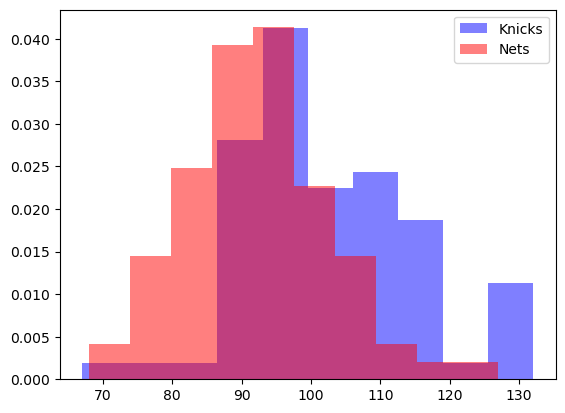

<Figure size 640x480 with 0 Axes>

In [14]:
plt.hist(knicks_pts_10, color="blue", label="Knicks", density=True, alpha=0.5)
plt.hist(nets_pts_10, color="red", label="Nets", density=True, alpha=0.5)
plt.legend()
plt.show()
plt.clf()


23469     90
23473     81
23480    100
23486     97
23490    101
Name: pts, dtype: int64
23468     94
23475    101
23482     86
23484    104
23494    108
Name: pts, dtype: int64
Mean difference: 0.44706798131809933


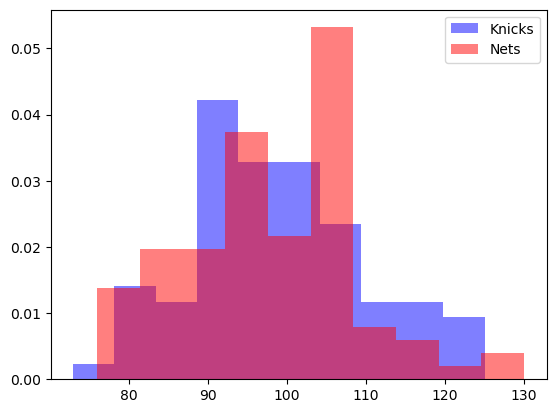

<Figure size 640x480 with 0 Axes>

In [16]:
#lo mismo pero para el año 2014

knicks_pts_14 = nba_2014[ nba_2014.fran_id == 'Knicks']
knicks_pts_14 = knicks_pts_14['pts']
print(knicks_pts_14.head())

nets_pts_14 = nba_2014[ nba_2014.fran_id == 'Nets']
nets_pts_14 = nets_pts_14['pts']
print(nets_pts_14.head()) #lo mismo que hacer nets_pts_10 = nba_2010.pts[ nba_2010.fran_id == 'Nets']

diff_means_2014 = abs( knicks_pts_14.mean() - nets_pts_14.mean() )
print("Mean difference: "+str(diff_means_2014)) #diferencia de promedio de puntos

plt.hist(knicks_pts_14, color="blue", label="Knicks", density=True, alpha=0.5)
plt.hist(nets_pts_14, color="red", label="Nets", density=True, alpha=0.5)
plt.legend()
plt.show()
plt.clf()

#la diferencia de la media no tiene sentido, esto lo sabemos gracias al gráfico

Axes(0.125,0.11;0.775x0.77)
franchise means:
{'Celtics': 98.009, 'Knicks': 102.11, 'Nets': 92.378, 'Thunder': 100.966, 'Spurs': 100.793}


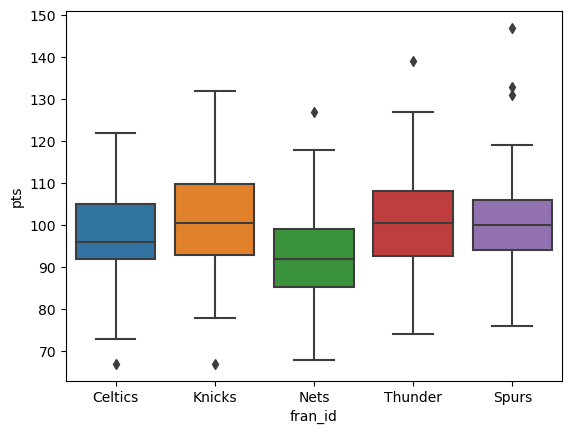

In [27]:
boxes=sns.boxplot(data = nba_2010, x = 'fran_id', y = 'pts')#vamos a ver si los puntos se relacionan con el equipo principalmente
print(boxes)

avg_points={}
for franchise in nba_2010['fran_id'].unique():
    nba_franchise = nba_2010[nba_2010.fran_id == franchise]
    avg_points[franchise]=round(nba_franchise.pts.mean(), 3)
print("franchise means:")
print(avg_points)
#fran_id and pts are associated

In [29]:
location_result_freq = pd.crosstab(nba_2010.game_result, nba_2010.game_location)
print(location_result_freq)

game_location    A    H
game_result            
L              133  105
W               92  120


In [30]:
location_result_proportions = location_result_freq / len(nba_2010)
print(location_result_proportions)

game_location         A         H
game_result                      
L              0.295556  0.233333
W              0.204444  0.266667


In [33]:
chi2, pval, dof, expected = chi2_contingency(location_result_freq) #mando una tabla de frecuencias, no la de proporciones
print(np.round(expected)) #expected es la tabla nueva
print(chi2)

[[119. 119.]
 [106. 106.]]
6.501704455367053


In [34]:
#forecast representa la proba de ganar, veremos si está relacionado a ganar con más puntos si el forecast es mayor
point_diff_forecast_cov = np.cov(nba_2010.forecast, nba_2010.point_diff)
print(point_diff_forecast_cov)

[[  0.05   1.37]
 [  1.37 186.56]]


In [36]:
#la covarianza es de 1.37, recordar que 0.6 
correlation, p =pearsonr(nba_2010.forecast, nba_2010.point_diff)
print(correlation)# mayor a 0.3, se indica una dependencia donde crecen ambos valores juntos linealmente

0.4402088708468084


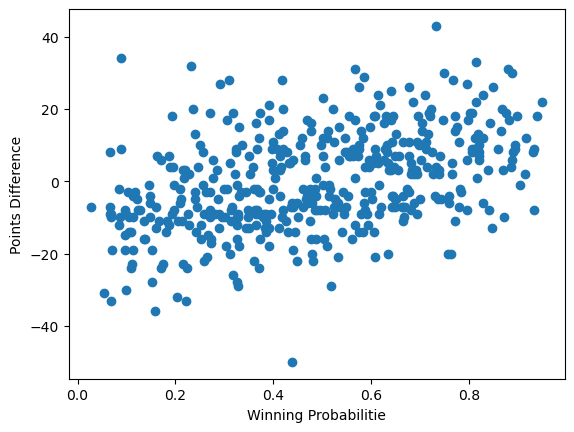

<Figure size 640x480 with 0 Axes>

In [37]:
plt.scatter(x=nba_2010.forecast, y=nba_2010.point_diff)
plt.xlabel('Winning Probabilitie')
plt.ylabel('Points Difference')#se ve un patrón que coincide con una recta de pendiente igual a la correlation
plt.show()
plt.clf()